<a href="https://colab.research.google.com/github/saipragna25/255--mid-term-catchup-assignment-decision-tree-and-ensembles/blob/main/GBM_midcatchup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Boosting machine From Scratch

In [1]:
#hide
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt 
plt.style.use('default')

%matplotlib inline

In [2]:
#hide
import numpy as np 

rng = np.random.default_rng()
x = np.linspace(0, 10, 50)
y = np.where(x < 5, x, 5) + rng.normal(0, 0.4, size=x.shape)
x = x.reshape(-1,1)

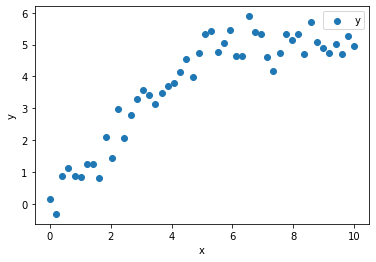

In [3]:
#hide_input
plt.scatter(x,y, label='y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [4]:
#hide
eta = 1

F_0 = y.mean() * np.ones(shape=y.shape)

h_1 = DecisionTreeRegressor(max_depth=1)
h_1.fit(x, y - F_0)
F_1 = F_0 + eta * h_1.predict(x)

h_2 = DecisionTreeRegressor(max_depth=1)
h_2.fit(x, y - F_1)
F_2 = F_1 + eta * h_2.predict(x)

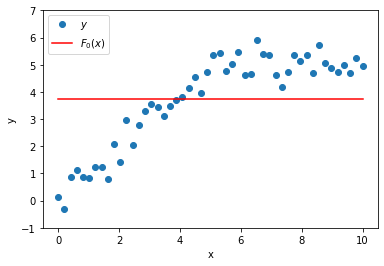

In [5]:
#hide_input
plt.plot(x, y, 'o', label=r'$y$')
plt.plot(x, F_0, '-r', label=r'$F_0(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim([-1,7]);

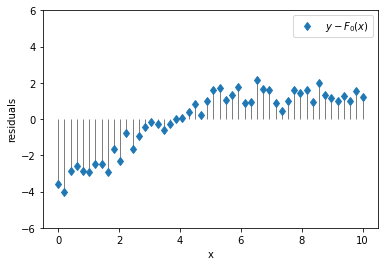

In [6]:
#hide_input
fig, ax = plt.subplots()
ax.plot(x, y - F_0, 'd', label=r'$y - F_0(x)$')
ax.vlines(x, 0, y - F_0, linewidth=0.5)
# plt.plot(x, h_1.predict(x), '--r', label=r'$h_1(x)$')
plt.xlabel('x')
plt.ylabel('residuals')
ax.legend()
ax.set_ylim([-6, 6]);

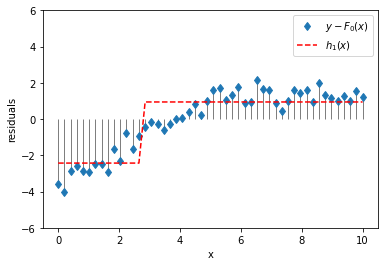

In [7]:
#hide_input
fig, ax = plt.subplots()
ax.plot(x, y - F_0, 'd', label=r'$y - F_0(x)$')
ax.vlines(x, 0, y - F_0, linewidth=0.5)
plt.plot(x, h_1.predict(x), '--r', label=r'$h_1(x)$')
plt.xlabel('x')
plt.ylabel('residuals')
ax.legend()
ax.set_ylim([-6, 6]);

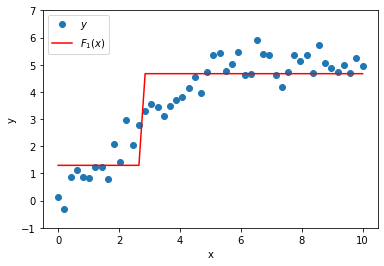

In [8]:
#hide_input
plt.plot(x, y, 'o', label=r'$y$')
plt.plot(x, F_1, '-r', label=r'$F_1(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim([-1,7]);

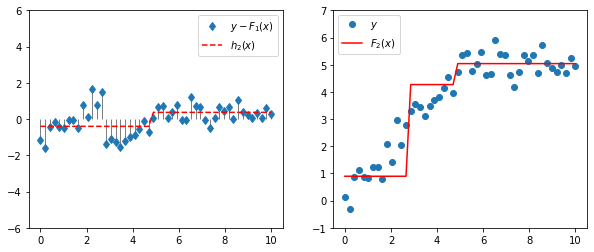

In [9]:
#hide_input

# m = 2

fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(x, y - F_1, 'd', label=r'$y - F_1(x)$')
ax[0].vlines(x, 0, y - F_1, linewidth=0.5)
ax[0].plot(x, h_2.predict(x), '--r', label=r'$h_2(x)$')
ax[0].legend()
ax[0].set_ylim([-6, 6])

ax[1].plot(x, y, 'o', label=r'$y$')
ax[1].plot(x, F_2, '-r', label=r'$F_2(x)$')
ax[1].legend()
ax[1].set_ylim([-1,7]);

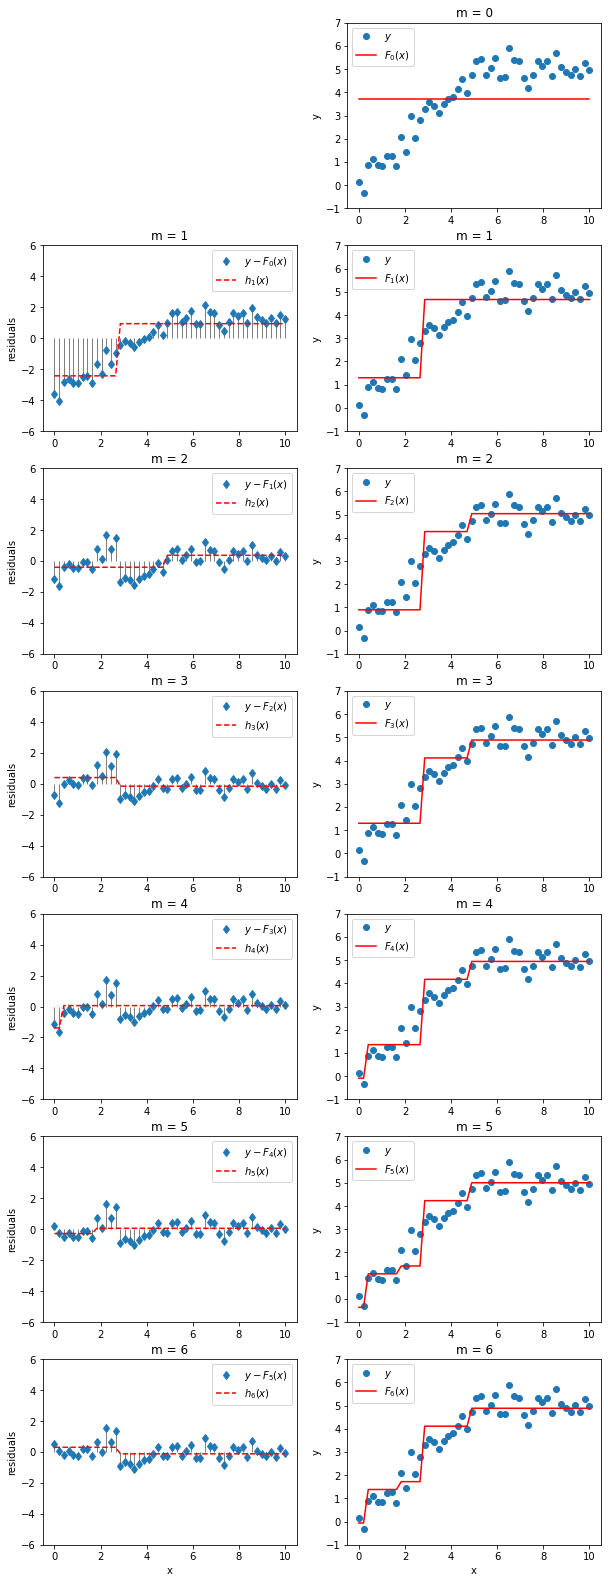

In [10]:
#hide_input
# hyperparameters
learning_rate = 1
n_trees = 6
max_depth = 1

# Training
F0 = y.mean() 

fig, ax = plt.subplots(7,2, figsize=(10,28))

ax[0,0].axis('off')
ax[0,1].plot(x, y, 'o', label=r'$y$')
ax[0,1].plot(x, F_0, '-r', label=r'$F_0(x)$')
ax[0,1].set_title('m = 0')
ax[0,1].set_ylabel('y')
ax[0,1].legend()
ax[0,1].set_ylim([-1,7]);

Fm = F0
trees = []
for i in range(n_trees):
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(x, y - Fm)

    m = i + 1
    
    ax[m,0].plot(x, y - Fm, 'd', label=r'$y - F_{}(x)$'.format(m-1))
    ax[m,0].vlines(x, 0, y - Fm, linewidth=0.5)
    ax[m,0].plot(x, tree.predict(x), '--r', label=r'$h_{}(x)$'.format(m))
    ax[m,0].legend()
    ax[m,0].set_ylim([-6, 6])
    ax[m,0].set_title('m = {}'.format(m))
    ax[m,0].set_ylabel('residuals')

    Fm += learning_rate * tree.predict(x)
    trees.append(tree)
    
    ax[m,1].plot(x, y, 'o', label=r'$y$')
    ax[m,1].plot(x, Fm, '-r', label=r'$F_{}(x)$'.format(m))
    ax[m,1].legend()
    ax[m,1].set_ylim([-1,7])
    ax[m,1].set_title('m = {}'.format(m))
    ax[m,1].set_ylabel('y')

ax[m,0].set_xlabel('x')
ax[m,1].set_xlabel('x');

In [11]:
from sklearn.tree import DecisionTreeRegressor

# model hyperparameters
learning_rate = 0.3
n_trees = 10
max_depth = 1

# Training
F0 = y.mean() 
Fm = F0
trees = []
for _ in range(n_trees):
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(x, y - Fm)
    Fm += learning_rate * tree.predict(x)
    trees.append(tree)

# Prediction
y_hat = F0 + learning_rate * np.sum([t.predict(x) for t in trees], axis=0)

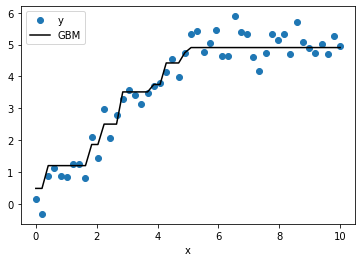

In [12]:
#hide_input
plt.plot(x,y,'o', label='y')
plt.plot(x,y_hat,'-k', label='GBM')
plt.legend()
plt.xlabel('x');

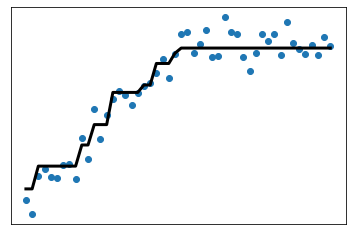

In [13]:
#hide
fig , ax = plt.subplots()
plt.plot(x,y,'o', label='y')
plt.plot(x,y_hat,'-k', label='GBM', linewidth=3)
# plt.legend(loc=4, prop={'size': 15})
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.xlabel('x');

In [14]:
class GradientBoostingFromScratch():
    
    def __init__(self, n_trees, learning_rate, max_depth=1):
        self.n_trees=n_trees; self.learning_rate=learning_rate; self.max_depth=max_depth;
        
    def fit(self, x, y):
        self.trees = []
        self.F0 = y.mean()
        Fm = self.F0 
        for _ in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(x, y - Fm)
            Fm += self.learning_rate * tree.predict(x)
            self.trees.append(tree)
            
    def predict(self, x):
        return self.F0 + self.learning_rate * np.sum([tree.predict(x) for tree in self.trees], axis=0)

comparision with sklearn GradientBoostingRegressor.

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

sklearn_gbm = GradientBoostingRegressor(n_estimators =25, learning_rate=0.3, max_depth=1)
sklearn_gbm.fit(x,y)

scratch_gbm = GradientBoostingFromScratch(n_trees=25, learning_rate=0.3, max_depth=1)
scratch_gbm.fit(x,y)

mean_squared_error(y, sklearn_gbm.predict(x)), mean_squared_error(y, scratch_gbm.predict(x))

(0.10235592261045681, 0.10235592261045688)